## PLANEJAMENTO E CONTROLE DA EXPANSÃO TERRITORIAL URBANA NA IMPLEMENTAÇÃO DO PLANO DIRETOR

### **Capítulo 4** | Crescimento espacial urbano e implementação de planos diretores: estudo de caso em São Carlos - SP

##### **Autoria:** Isabel Cristina Nunes de Sousa
---

### **Carrega pacotes**

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from watermark import watermark

%load_ext watermark

Versões dos pacotes:

In [2]:
%watermark --watermark

Watermark: 2.3.1



In [3]:
%watermark --iversions

geopandas : 0.13.0
pandas    : 2.0.1
matplotlib: 3.7.1



Informações de *hardware*:

In [4]:
print(watermark())

Last updated: 2023-06-21T17:24:14.178015-03:00

Python implementation: CPython
Python version       : 3.10.10
IPython version      : 8.14.0

Compiler    : MSC v.1934 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit



### **GeoDataFrames**

In [5]:
# Carrega GeoDataFrames gerados no QGIS
areas_totais_urbanizadas = gpd.read_file('dados/areas_totais_urbanizadas.shp')
areas_urbanizadas_desconforme = gpd.read_file('dados/areas_urbanizadas_desconforme.shp')
areas_urbanizaveis = gpd.read_file('dados/areas_urbanizaveis.shp')
areas_urbanizadas = gpd.read_file('dados/areas_urbanizadas.shp')

### **Cálculo de áreas e indicadores com base em dados gerados no QGIS**

In [6]:
# Área total urbanizada (zonas 7, 4A e 4B)
area_tot_urbanizada_N = areas_totais_urbanizadas['area_ha'].loc[areas_totais_urbanizadas['Quadrante'] == 'Norte'].sum()
area_tot_urbanizada_L = 0
area_tot_urbanizada_S = 0
area_tot_urbanizada_O = areas_totais_urbanizadas['area_ha'].loc[areas_totais_urbanizadas['Quadrante'] == 'Oeste'].sum()

area_total_urbanizada = area_tot_urbanizada_N + area_tot_urbanizada_L + area_tot_urbanizada_S + area_tot_urbanizada_O
print(f'Área total urbanizada (zonas 7, 4A e 4B): {area_total_urbanizada:.2f} ha')

# Área urbanizada desconforme o plano (zona 7)
area_urban_desconf_N = 0
area_urban_desconf_L = 0
area_urban_desconf_S = 0
area_urban_desconf_O = areas_urbanizadas_desconforme['area_ha'].sum()

area_urbanizada_desconforme = area_urban_desconf_N + area_urban_desconf_L + area_urban_desconf_S + area_urban_desconf_O
print(f'Área urbanizada desconforme o plano (zona 7): {area_urbanizada_desconforme:.2f} ha')

# Área urbanizada conforme o plano (zonas 4A e 4B)
area_urban_conf_N = area_tot_urbanizada_N
area_urban_conf_L = 0
area_urban_conf_S = 0
area_urban_conf_O = (area_tot_urbanizada_O - area_urban_desconf_O)

area_urbanizada_conforme = area_urban_conf_N + area_urban_conf_L + area_urban_conf_S + area_urban_conf_O
print(f'Área urbanizada conforme o plano (zonas 4A e 4B): {area_urbanizada_conforme:.2f} ha')

# Área urbanizável (zonas 4A e 4B + interior perímetro)
area_urbanizavel_N = areas_urbanizaveis['area_ha'].loc[areas_urbanizaveis['Quadrante'] == 'Norte'].sum()
area_urbanizavel_L = areas_urbanizaveis['area_ha'].loc[areas_urbanizaveis['Quadrante'] == 'Leste'].sum()
area_urbanizavel_S = areas_urbanizaveis['area_ha'].loc[areas_urbanizaveis['Quadrante'] == 'Sul'].sum()
area_urbanizavel_O = areas_urbanizaveis['area_ha'].loc[areas_urbanizaveis['Quadrante'] == 'Oeste'].sum()

area_urbanizavel = area_urbanizavel_N + area_urbanizavel_L + area_urbanizavel_S + area_urbanizavel_O
print(f'Área urbanizável (zonas 4A e 4B + interior perímetro): {area_urbanizavel:.2f} ha')

# Área urbanizada
area_urbaniza_N = areas_urbanizadas['area_ha'].loc[areas_urbanizadas['Quadrante'] == 'Norte'].sum()
area_urbaniza_L = areas_urbanizadas['area_ha'].loc[areas_urbanizadas['Quadrante'] == 'Leste'].sum()
area_urbaniza_S = areas_urbanizadas['area_ha'].loc[areas_urbanizadas['Quadrante'] == 'Sul'].sum()
area_urbaniza_O = areas_urbanizadas['area_ha'].loc[areas_urbanizadas['Quadrante'] == 'Oeste'].sum()

area_urbanizada = area_urbaniza_N + area_urbaniza_L + area_urbaniza_S + area_urbaniza_O
print(f'Área urbanizada: {area_urbanizada:.2f} ha')

# Área total (planejada e urbanizada)
area_total_N = area_tot_urbanizada_N + area_urbanizavel_N
area_total_L = area_tot_urbanizada_L + area_urbanizavel_L
area_total_S = area_tot_urbanizada_S + area_urbanizavel_S
area_total_O = area_tot_urbanizada_O + area_urbanizavel_O

area_total = (area_total_N + area_total_L + area_total_S + area_total_O) + area_urbanizada
print(f'Área total (planejada e urbanizada): {area_total:.2f} ha')

# Proporção urbanizado
prop_urbanizado_N = area_tot_urbanizada_N/area_total_urbanizada
prop_urbanizado_L = area_tot_urbanizada_L/area_total_urbanizada
prop_urbanizado_S = area_tot_urbanizada_S/area_total_urbanizada
prop_urbanizado_O = area_tot_urbanizada_O/area_total_urbanizada

prop_urbanizado = prop_urbanizado_N + prop_urbanizado_L + prop_urbanizado_S + prop_urbanizado_O

# Percentual urbanizado
perc_urbanizado_N = prop_urbanizado_N*100
perc_urbanizado_L = prop_urbanizado_L*100
perc_urbanizado_S = prop_urbanizado_S*100
perc_urbanizado_O = prop_urbanizado_O*100

perc_urbanizado = perc_urbanizado_N + perc_urbanizado_L + perc_urbanizado_S + perc_urbanizado_O
print(f'\nPercentual urbanizado (Norte): {perc_urbanizado_N:.2f}%')
print(f'Percentual urbanizado (Oeste): {perc_urbanizado_O:.2f}%')

# Taxa de implementação do planejamento - Tp
Tp = (area_urbanizada_conforme/area_urbanizavel)*100
print(f'\nTaxa de implementação do planejamento - Tp: {Tp: .2f}%')

# Taxa de urbanização não planejada – TUnP
TUnP = (area_urbanizada_desconforme/area_urbanizavel)*100
print(f'Taxa de urbanização não planejada – TUnP: {TUnP: .2f}%')

# Taxa de urbanização legal – TL
TL = (area_urbanizada_conforme/area_total_urbanizada)*100
print(f'Taxa de urbanização legal - TL: {TL:.2f}%')

# Taxa de urbanização ilegal – TiL
TiL = (area_urbanizada_desconforme/area_total_urbanizada)*100
print(f'Taxa de urbanização ilegal - TiL: {TiL:.2f}%')

# Eficácia no Controle de Limites – ECL
ECL = area_urbanizada_desconforme/area_urbanizada_conforme
print(f'\nEficácia no Controle de Limites – ECL: {ECL:.2f}')

Área total urbanizada (zonas 7, 4A e 4B): 145.14 ha
Área urbanizada desconforme o plano (zona 7): 43.83 ha
Área urbanizada conforme o plano (zonas 4A e 4B): 101.31 ha
Área urbanizável (zonas 4A e 4B + interior perímetro): 8784.55 ha
Área urbanizada: 5432.20 ha
Área total (planejada e urbanizada): 14361.89 ha

Percentual urbanizado (Norte): 33.81%
Percentual urbanizado (Oeste): 66.19%

Taxa de implementação do planejamento - Tp:  1.15%
Taxa de urbanização não planejada – TUnP:  0.50%
Taxa de urbanização legal - TL: 69.80%
Taxa de urbanização ilegal - TiL: 30.20%

Eficácia no Controle de Limites – ECL: 0.43


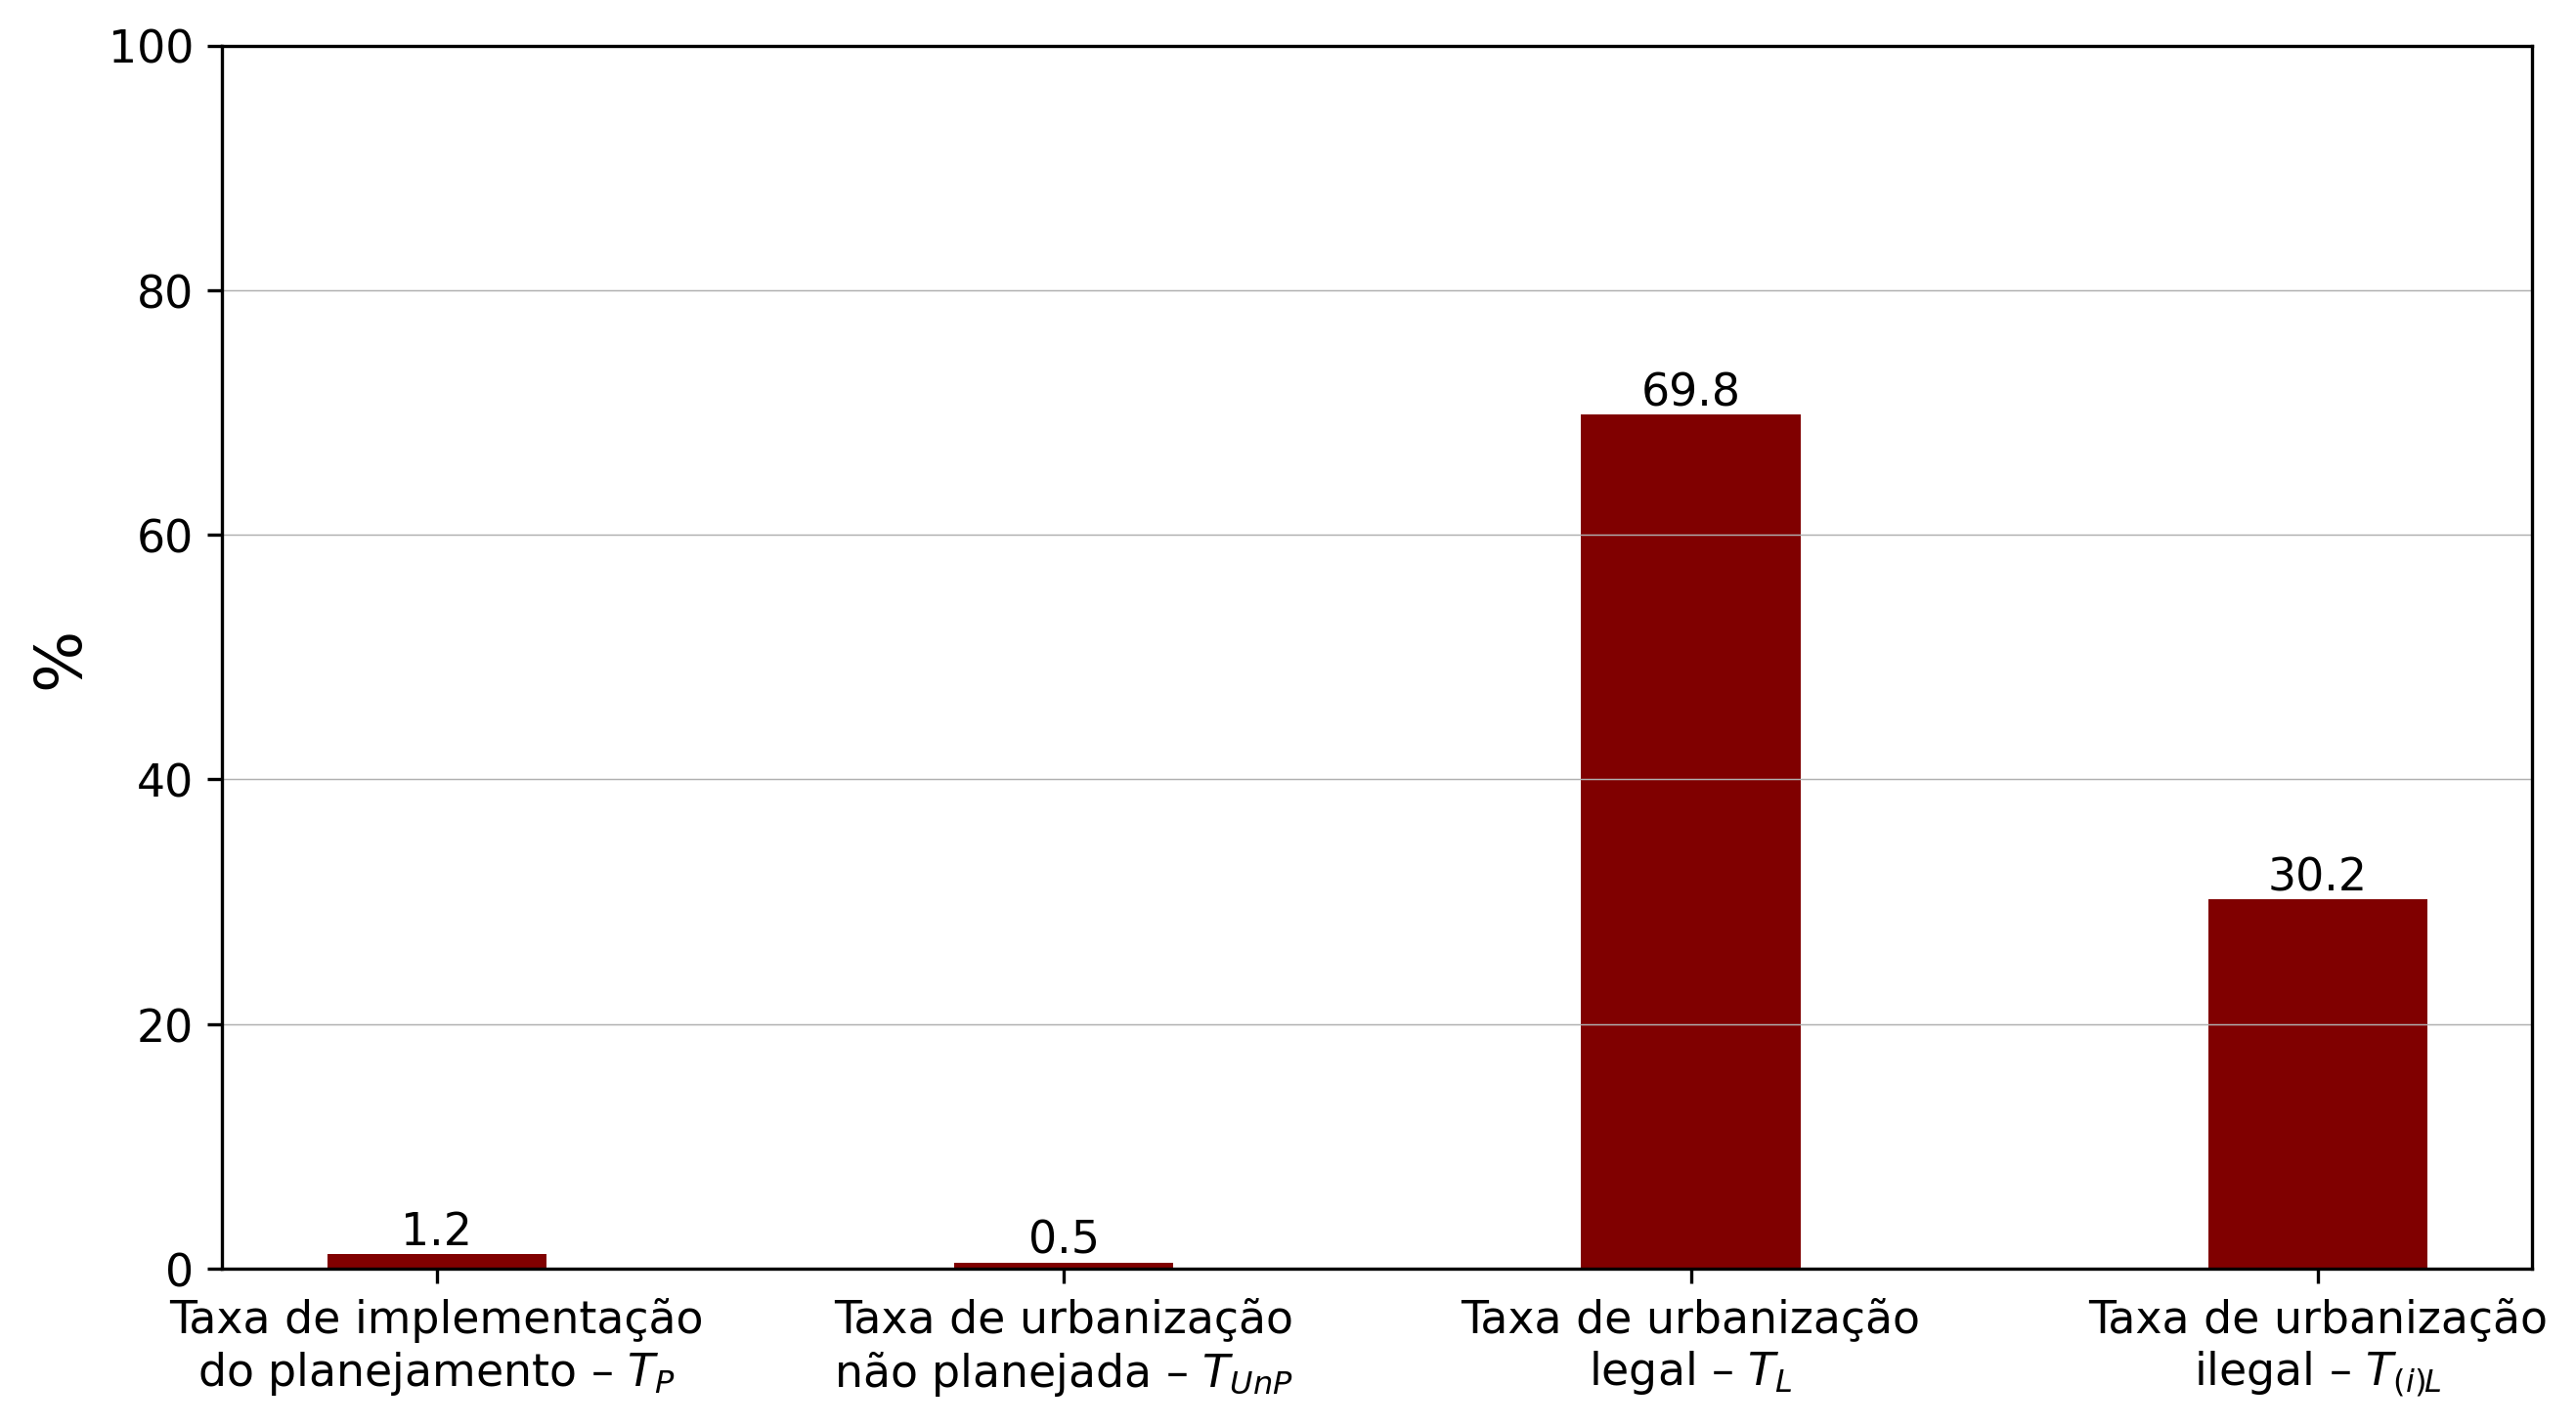

In [7]:
# Listas
nomes = ['Taxa de implementação\ndo planejamento – $T_P$',
         'Taxa de urbanização\nnão planejada – $T_{UnP}$',
         'Taxa de urbanização\nlegal – $T_L$',
         'Taxa de urbanização\nilegal – $T_{(i)L}$']
valores = [Tp, TUnP, TL, TiL]


# Cria gráficos
plt.figure(figsize=(9, 5), dpi=300)
plt.rcParams.update({'font.size': 11})
bars = plt.bar(nomes, valores, color='maroon', width=0.35)

plt.ylabel('%', fontsize=16)
plt.ylim(0, 100)
plt.grid(axis='y', linewidth=0.35)

# Adiciona valores ao topo das barras
for bar, valor in zip(bars, valores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{valor:.1f}', ha='center', va='bottom')

plt.savefig('figuras/fig_5.png', dpi=300)
plt.tight_layout()
plt.show()

#### **Indicadores por quadrantes geográficos**

In [8]:
# Equilíbrio Direcional - ED
print('Equilíbrio Direcional - ED:\n')

ED_N = area_tot_urbanizada_N/area_urbanizavel_N
print(f'Norte: {ED_N:.2f}%')

ED_L = area_tot_urbanizada_L/area_urbanizavel_L
print(f'Leste: {ED_L:.1f}%')

ED_S = area_tot_urbanizada_S/area_urbanizavel_S
print(f'Sul: {ED_S:.1f}%')

ED_O = area_tot_urbanizada_O/area_urbanizavel_O
print(f'Oeste: {ED_O:.2f}%')

Equilíbrio Direcional - ED:

Norte: 0.01%
Leste: 0.0%
Sul: 0.0%
Oeste: 0.10%


In [9]:
# Eficácia no Controle de Limites – ECL
print('Eficácia no Controle de Limites – ECL:\n')

ECL_N = area_urban_desconf_N/area_urban_conf_N
print(f'Norte: {ECL_N:.1f}%')

try:
    ECL_L = area_urban_desconf_L/area_urban_conf_L
except ZeroDivisionError:
    ECL_L = 0
print(f'Leste: {ECL_L:.1f}%')

try:
    ECL_S = area_urban_desconf_S/area_urban_conf_S
except ZeroDivisionError:
    ECL_S = 0
print(f'Sul: {ECL_S:.1f}%')

ECL_O = area_urban_desconf_O/area_urban_conf_O
print(f'Oeste: {ECL_O:.2f}%')

Eficácia no Controle de Limites – ECL:

Norte: 0.0%
Leste: 0.0%
Sul: 0.0%
Oeste: 0.84%


In [10]:
# Taxa de implementação do planejamento - Tp
print('Taxa de implementação do planejamento - Tp:\n')

Tp_N = (area_urban_conf_N/area_urbanizavel_N)*100
print(f'Norte: {Tp_N:.2f}%')

Tp_L = (area_urban_conf_L/area_urbanizavel_L)*100
print(f'Leste: {Tp_L:.1f}%')

Tp_S = (area_urban_conf_S/area_urbanizavel_S)*100
print(f'Sul: {Tp_S:.1f}%')

Tp_O = (area_urban_conf_O/area_urbanizavel_O)*100
print(f'Oeste: {Tp_O:.2f}%')

Taxa de implementação do planejamento - Tp:

Norte: 0.75%
Leste: 0.0%
Sul: 0.0%
Oeste: 5.63%


In [11]:
# Taxa de urbanização não planejada – TUnP
print('Taxa de urbanização não planejada – TUnP:\n')

TUnP_N = (area_urban_desconf_N/area_urbanizavel_N)*100
print(f'Norte: {TUnP_N:.1f}%')

TUnP_L = (area_urban_desconf_L/area_urbanizavel_L)*100
print(f'Leste: {TUnP_L:.1f}%')

TUnP_S = (area_urban_desconf_S/area_urbanizavel_S)*100
print(f'Sul: {TUnP_S:.1f}%')

TUnP_O = (area_urban_desconf_O/area_urbanizavel_O)*100
print(f'Oeste: {TUnP_O:.2f}%')

Taxa de urbanização não planejada – TUnP:

Norte: 0.0%
Leste: 0.0%
Sul: 0.0%
Oeste: 4.72%


In [12]:
# Taxa de urbanização legal – TL
print('Taxa de urbanização legal – TL:\n')

TL_N = (area_urban_conf_N/area_tot_urbanizada_N)*100
print(f'Norte: {TL_N:.1f}%')

try:
    TL_L = (area_urban_conf_L/area_tot_urbanizada_L)*100
except ZeroDivisionError:
    TL_L = 0
print(f'Leste: {TL_L:.1f}%')

try:
    TL_S = (area_urban_conf_S/area_tot_urbanizada_S)*100
except ZeroDivisionError:
    TL_S = 0
print(f'Sul: {TL_S:.1f}%')

TL_O = (area_urban_conf_O/area_tot_urbanizada_O)*100
print(f'Oeste: {TL_O:.2f}%')

Taxa de urbanização legal – TL:

Norte: 100.0%
Leste: 0.0%
Sul: 0.0%
Oeste: 54.38%


In [13]:
# Taxa de urbanização ilegal – TL
print('Taxa de urbanização ilegal – TiL:\n')

TiL_N = (area_urban_desconf_N/area_tot_urbanizada_N)*100
print(f'Norte: {TiL_N:.1f}%')

try:
    TiL_L = (area_urban_desconf_L/area_tot_urbanizada_L)*100
except ZeroDivisionError:
    TiL_L = 0
print(f'Leste: {TiL_L:.1f}%')

try:
    TiL_S = (area_urban_desconf_S/area_tot_urbanizada_S)*100
except ZeroDivisionError:
    TiL_S = 0
print(f'Sul: {TiL_S:.1f}%')

TiL_O = (area_urban_desconf_O/area_tot_urbanizada_O)*100
print(f'Oeste: {TiL_O:.2f}%')

Taxa de urbanização ilegal – TiL:

Norte: 0.0%
Leste: 0.0%
Sul: 0.0%
Oeste: 45.62%


In [14]:
# Listas
Quadrantes = ['Norte', 'Leste', 'Sul', 'Oeste']
ECL_q = [ECL_N, ECL_L, ECL_S, ECL_O]
ED_q = [ED_N, ED_L, ED_S, ED_O]
Tp_q = [Tp_N, Tp_L, Tp_S, Tp_O]
TUnP_q = [TUnP_N, TUnP_L, TUnP_S, TUnP_O]
TL_q = [TL_N, TL_L, TL_S, TL_O]
TiL_q = [TiL_N, TiL_L, TiL_S, TiL_O]

# Cria DataFrame a partir das listas
df_q = pd.DataFrame(list(zip(Quadrantes, ECL_q, ED_q, Tp_q, TUnP_q, TL_q, TiL_q)),
               columns =['Quadrantes', 'ECL', 'ED', 'Tp', 'TUnP', 'TL', 'TiL'])

# Exibe DataFrame com valores arredondados para duas casas decimais
df_q.round(2)

,Quadrantes,ECL,ED,Tp,TUnP,TL,TiL
0,Norte,0.00,0.01,0.75,0.00,100.00,0.00
1,Leste,0.00,0.00,0.00,0.00,0.00,0.00
2,Sul,0.00,0.00,0.00,0.00,0.00,0.00
3,Oeste,0.84,0.10,5.63,4.72,54.38,45.62


In [15]:
# Salva tabela como arquivo csv
df_q.to_csv('tabelas/tab_3.csv', index=False)